In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# carga del dataset
df = pd.read_csv('./customer.csv')
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


## Promedio de las caraterísticas

In [9]:
# promedio de la primer característica
income_mean = df.iloc[:, 0].mean()
income_mean

245.27392739273927

In [10]:
# promedio de la segunda característica
spend_mean = df.iloc[:, 1].mean()
spend_mean

149.64686468646866

## Gráfica dispersión de datos

In [11]:
# transformamos el DataFrame de Pandas a un array de NumPy
dataset = df.to_numpy()

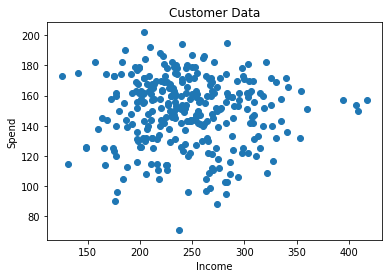

In [12]:
# gráfica de dispersión de los datos
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title('Customer Data')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

## Desarrollo del algoritmo K-Means

In [19]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    def __init__(self, K=3, max_iters=50, plot_it=False):
        '''Initializer of the class'''
        self.K = K
        self.max_iters = max_iters
        self.plot_it = plot_it
        
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        
    def predict(self, dataset):
        self.dataset = dataset
        self.n_samples, self.n_features = dataset.shape
        
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.dataset[idx] for idx in random_sample_idxs]
        
        # optimize the clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self.create_clusters(self.centroids)
            
            # calculate new centroids from the cluster
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.clusters)
            
            # check if the clusters have changed
            if self.is_converged(centroids_old, self.centroids):
                break
        
        if self.plot_it:
            self.plot()
        return (self.get_cluster_labels(self.clusters), self.clusters, self.centroids)
    
    def get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def create_clusters(self, centroids):
        # assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.dataset):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx) 
        return clusters
    
    def closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [distance(sample, centroid) for centroid in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.dataset[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, for all centroids
        distances = [distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.dataset[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        
        plt.title('Customer Data')
        plt.xlabel('Income')
        plt.ylabel('Spend')
        plt.show()

## Método del codo

In [14]:
elbows = np.empty([10, 2])
i = 1
while i <= 10:
    k = KMeans(K=i)
    _, clusters, centroids = k.predict(dataset)
    # calculate Ks with their wss
    for centroid_idx, cluster in enumerate(clusters):
        centroid = centroids[centroid_idx]
        wss = 0
        # distance from each sample to its centroid
        for sample_idx in cluster:
            wss += distance(dataset[sample_idx], centroid)
        elbows[i-1] = [i, wss]
    i += 1    

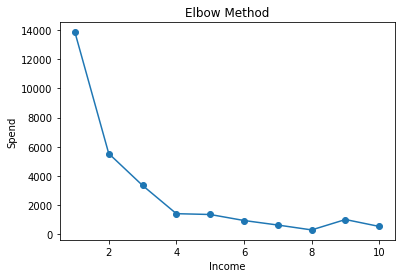

In [18]:
plt.plot(elbows[:,0], elbows[:,1], marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

## Gráfica de dispersión con clusters y centroides

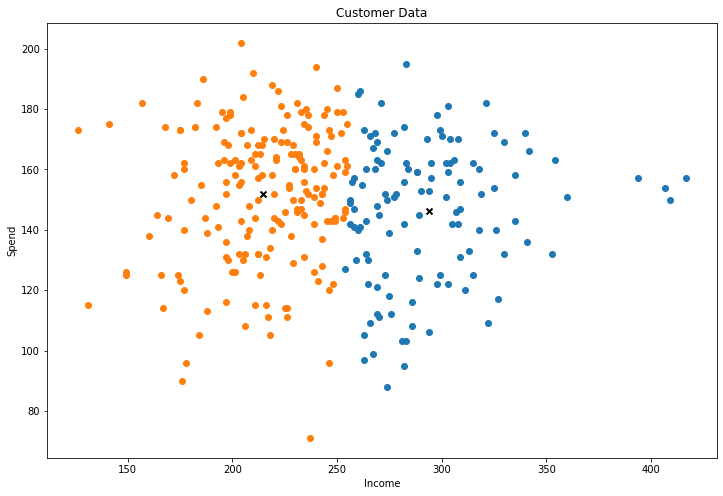

In [22]:
k = KMeans(K=2, plot_it=True)
result = k.predict(dataset)